<a href="https://colab.research.google.com/github/rashmi0852/Netflix_Content_Clustering_and_Recommended_System/blob/main/Netflix_Content_and_Recommended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Netflix_Content_Clustering_and_Recommended_System





##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Dataset Loading

In [2]:
# Load Dataset
netflix=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [3]:
# Dataset First Look
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

num_rows, num_cols = netflix.shape

print("Total rows in dataset=",num_rows)

print("Total columns in dataset=",num_cols)


Total rows in dataset= 7787
Total columns in dataset= 12


### Dataset Information

In [6]:
# Dataset Info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
netflix.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
netflix.isnull().sum()

Missing Values in each column
------------------------------


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

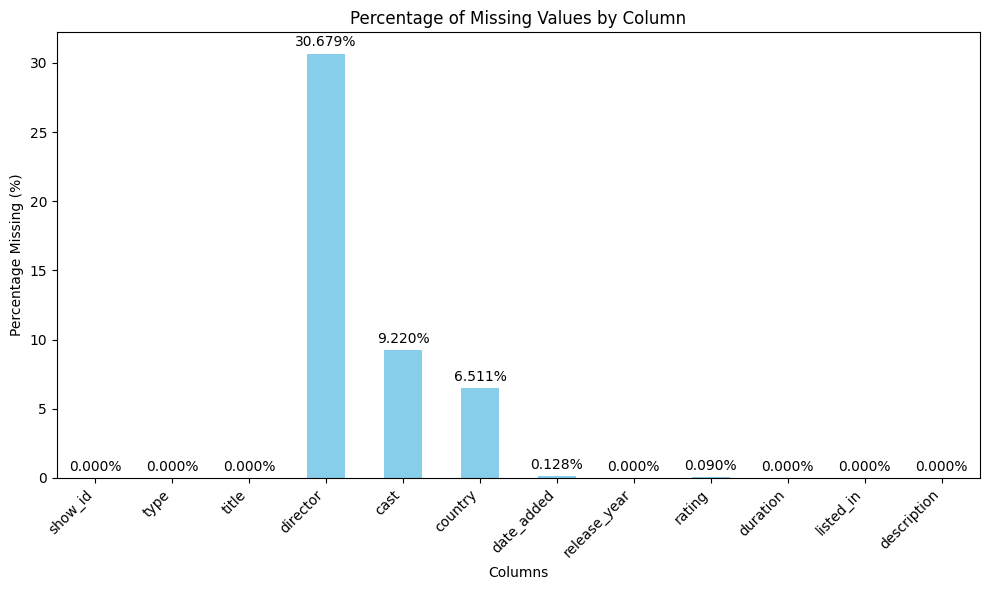

In [9]:
# Visualizing the missing values

#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)


#Bar plot
plt.figure(figsize=(10, 6))
bars=missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45,ha="right")

# Add data labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()



### What did you know about your dataset?

By exploring Netflix content datset following insights were found
* The dataset contains 12 features and 7,787 records.
* Five features contain missing values, with "director" having the highest number of null values, accounting for approximately 30% of its data, while the other four features have less than 10% missing data.
* Out of the 12 features, 11 are of categorical type, while the feature "release_year" is of numerical type.
* The "date_added" column values are in a time/date format, and the "duration" column values are in numeric format, so both need to be converted to their respective data types from the object type.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
# Dataset Columns
print(f"Available columns:\n{netflix.columns}")

Available columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [11]:
# Dataset Describe
netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

* show_id: Unique identifier for each movie/show.

* type: Indicates whether the entry is a movie or a TV show.

* title: Name of the movie or TV show.

* director: Name of the director(s) of the movie or TV show.

* cast: Names of the actors and actresses featured in the movie or TV show.

* country: Country or countries where the movie or TV show was produced.

* date_added: Date when the movie or TV show was added to Netflix.

* release_year: Year when the movie or TV show was released.

* rating: TV rating or movie rating of the movie or TV show.

* duration: Length of the movie or TV show in minutes or seasons.

* listed_in: Categories or genres of the movie or TV show.

* description: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for column in netflix.columns:
    # Get value counts for the current column
    value_counts = netflix[column].value_counts()

    # Get the number of unique values for the current column
    nunique = netflix[column].nunique()

    # Print the results for the current column
    print("--" * 50)
    print("Column Name:", column)
    print("\nNumber of Unique Values:", nunique)
    print("\nValue Counts:")
    print(value_counts,"\n")
    print("--" * 50)
    print("\n")


----------------------------------------------------------------------------------------------------
Column Name: show_id

Number of Unique Values: 7787

Value Counts:
s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: type

Number of Unique Values: 2

Value Counts:
Movie      5377
TV Show    2410
Name: type, dtype: int64 

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Column Name: title

Number of Unique Values: 7787

Value Counts:
3%                                          1
Results                     

* Focus is on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, plan is to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
Additionally, I will  develop a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Handeling Null Values

In [13]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent )

show_id          0.000
type             0.000
title            0.000
director        30.679
cast             9.220
country          6.511
date_added       0.128
release_year     0.000
rating           0.090
duration         0.000
listed_in        0.000
description      0.000
dtype: float64


In [14]:
# Drop records of those columns whose missing values less than 5%.
netflix.dropna(subset=["rating","date_added"],inplace=True)

In [15]:
#calculate mode & fill missing of country column

# Create a SimpleImputer with the "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Transform and fill the missing values in the "country" column
netflix['country'] = imputer.fit_transform(netflix[['country']])

In [16]:
# Replace missing values in the "cast" column with "unknown"
netflix['cast'].fillna('unknown', inplace=True)

# Replace missing values in the "director" column with "unknown"
netflix['director'].fillna('unknown', inplace=True)

In [17]:
#Calculate missing persentage for each column
missing_percent =round( (netflix.isnull().mean())*100,3)
print(missing_percent)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


#### Duration to numeric

In [18]:
# Extract the numeric part of the "duration" column and convert it to integer
netflix['duration'] = netflix['duration'].str.extract('(\d+)').astype(int)


In [19]:
netflix["duration"].head()

0      4
1     93
2     78
3     80
4    123
Name: duration, dtype: int64

#### date_added to date type

In [20]:
# Convert the "date_added" column to datetime type
netflix['date_added'] = pd.to_datetime(netflix['date_added'])


In [21]:
# Extract date, month, and year
netflix['added_day'] = netflix['date_added'].dt.day
netflix['added_month'] = netflix['date_added'].dt.month
netflix['added_year'] = netflix['date_added'].dt.year



In [22]:
netflix[["date_added","added_day","added_month","added_year"]].head()

,date_added,added_day,added_month,added_year
0,2020-08-14,14,8,2020
1,2016-12-23,23,12,2016
2,2018-12-20,20,12,2018
3,2017-11-16,16,11,2017
4,2020-01-01,1,1,2020


In [23]:
# Dropping date_added
netflix.drop('date_added', axis=1, inplace=True)

#### Ratings handeling

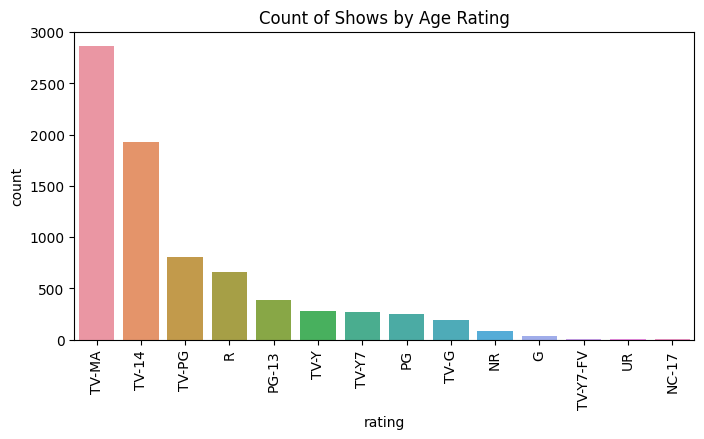

In [24]:
# Create a countplot to visualize the age ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=netflix, order=netflix['rating'].value_counts().index)
plt.title('Count of Shows by Age Rating')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [25]:
#Unique values of rating
print(netflix["rating"].unique())
netflix["rating"].nunique()

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


14

In [26]:
#Create corresponding alternate map for all categories
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'NR':'Adults',
              'NC-17':'Adults',
              'UR':'Adults',
              'TV-14':'Young Adults',
              'PG-13':'Teens',
              'TV-PG':'Older Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'TV-Y7-FV':'Older Kids',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'G':'Kids',
            }

In [27]:
#Replace by map values
netflix['rating'].replace(rating_map, inplace = True)

In [28]:
print(netflix['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


#### Extract primary value for country & listed_in

In [29]:
#check values of coutry column
netflix["country"].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [30]:
#check values of listed_in column
netflix["listed_in"].value_counts()


Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [31]:
# Function to extract the primary value
def extract_primary(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value

# Apply the function to 'country' and 'listed_in' columns
netflix['country'] = netflix['country'].apply(extract_primary)
netflix['listed_in'] = netflix['listed_in'].apply(extract_primary)


netflix.sample(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_day,added_month,added_year
1125,s1126,TV Show,Buddi,unknown,"Greta Jameson, Ralf Jameson, Clementine Laikin...",United Kingdom,2020,Kids,2,British TV Shows,"The Buddis bounce, spin, glide — and giggle! —...",11,9,2020
1350,s1351,TV Show,Chosen,unknown,"Lan Cheng-Lung, Deng JiaJia, Han Pengyi, Sam H...",China,2019,Young Adults,2,Crime TV Shows,"When a mysterious box arrives at his door, a d...",17,10,2019
7517,s7518,Movie,Wedding Unplanned,Reem Kherici,"Reem Kherici, Nicolas Duvauchelle, Julia Piato...",France,2017,Adults,94,Comedies,Mathias's girlfriend finds a business card for...,19,10,2017
4553,s4554,TV Show,Nurses Who Kill,unknown,unknown,United Kingdom,2016,Young Adults,1,British TV Shows,"Top medical, criminal and psychological expert...",1,8,2017
6708,s6709,Movie,The Night Clerk,Michael Cristofer,"Tye Sheridan, Ana de Armas, Helen Hunt, John L...",United States,2020,Adults,90,Dramas,"After a charming guest checks in, a voyeuristi...",6,6,2020


### What all manipulations have you done and insights you found?

* ***missing values handeling:***
 - Netfix dataset have null values in 5 columns .`rating`,`date_added` contains missing values less than 5 % so i droped them with dropna().
 - `country`,`cast` & `director` has missing values 6%,9% & 30% respectively ,country column missing values replaced by most frequent values with simple imputer() & cast & director replaced by unknown value.
* ***Duration , Date_added & Ratings Handeling:***
 - `duration` column contains values for content duration & it was originally in object form , convered to integer form by removing min/season word from it.
 - `date_added` has date within so it converted to date form & then day,month year exrated from it.
 - `ratings` contains multiple types of ratings from different userd ,it converted to adult,kinds,teens etc form.
* ***Extract primary value for country & listed_in:***
 - `country`,`listed_in` has multiple values within it ,primary value is extrated from both the columns.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate Analysis

#### Chart - 1

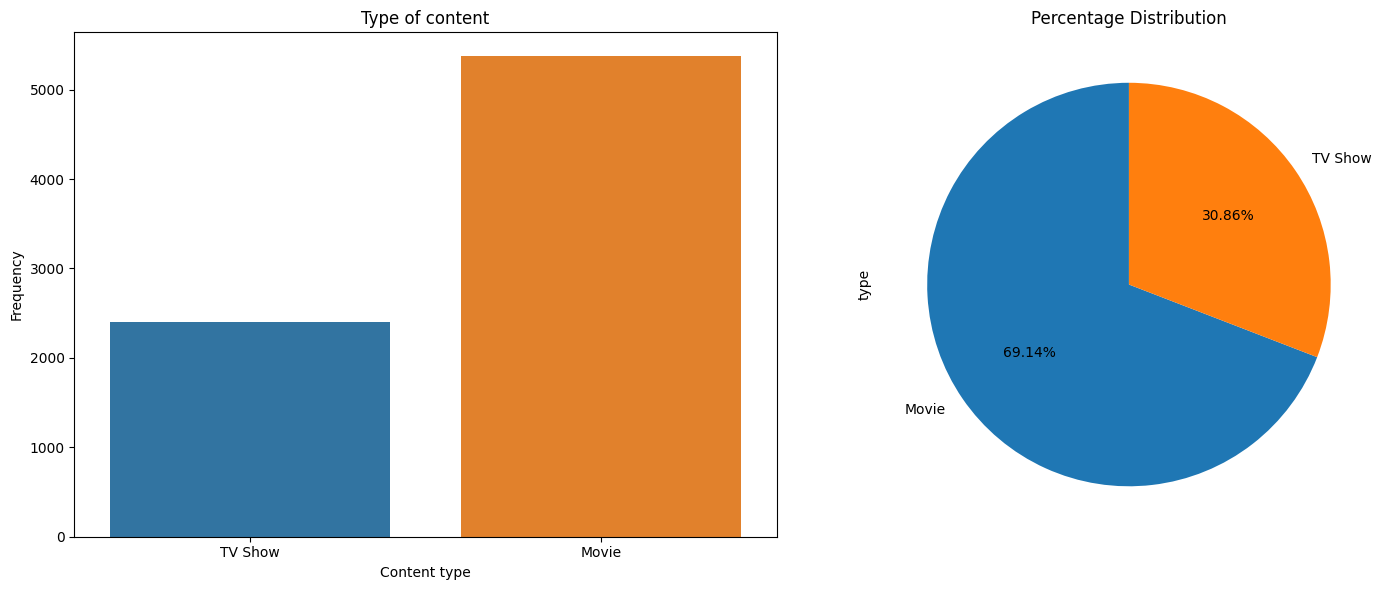

In [32]:
# Problem -1: What are the different type of content available?
# Chart - 1 visualization code

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Countplot
sns.countplot(data=netflix, x="type", ax=ax[0])
ax[0].set_title("Type of content")
ax[0].set_xlabel("Content type")
ax[0].set_ylabel("Frequency")

# Pie Chart
netflix['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], startangle=90)
ax[1].set_title('Percentage Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots side by side
plt.show()


##### 1. Why did you pick the specific chart?

we've chosen a countplot to show the exact counts of "Movies" and "TV Shows." This gives a clear comparison of how many of each type of content is in our dataset. Additionally, we've chosen a pie chart to show the percentage distribution of these content types, which allows us to see the proportion of movies and TV shows in the whole dataset.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the content available on Netflix is in the form of "Movies."
* "TV Shows" constitute a smaller portion of the overall content on the platform.
* The pie chart provides a clear visual representation of the distribution, with "Movies" taking up a larger portion of the whole.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

  - Content Strategy: The insight that a larger portion of the content consists of "Movies" suggests that movies are more prevalent on the platform. This could inform content acquisition and production strategies, allowing Netflix to focus on obtaining popular and diverse movie titles to cater to a wider audience.

  - User Engagement: Understanding that "Movies" dominate the content catalog can help Netflix tailor its marketing and user engagement strategies. This insight could lead to targeted promotional campaigns for specific genres, leveraging the popularity of movies to attract and retain subscribers.

  - Retention Strategies: By knowing that movies are more abundant, Netflix can create customized recommendations and curated collections to enhance user engagement and satisfaction. Providing users with relevant movie suggestions could lead to increased usage and longer subscription durations.

* Negative Growth Insights:

  - The provided visualizations do not directly indicate any insights that would lead to negative growth. However, it's important to note that the lack of "TV Shows" might imply a potential gap in certain content areas:

  - Diversity of Content: If the available "TV Shows" are limited in number or variety, there could be negative implications for subscribers who prefer TV series. They might find the content offerings lacking, potentially leading to lower satisfaction or churn.

  - Market Competitiveness: If competitors are offering a broader range of TV shows, Netflix might face challenges in attracting users who are specifically seeking TV series content. This could impact their market share.



#### Chart - 2

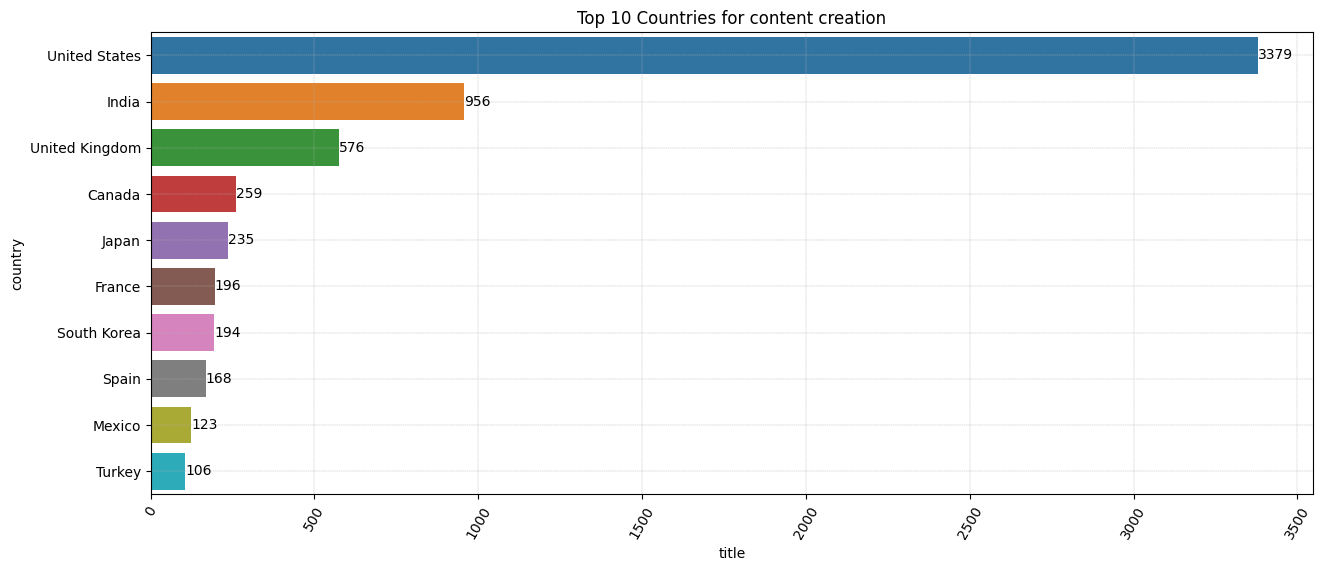

In [33]:
# problem-2: which are top 10 countries in content creation?
# Chart - 2 visualization code

df_country = netflix.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a bar chart in the provided visualization code is apt for conveying the "Top 10 Countries for Content Creation." It effectively presents categorical data, showcasing the number of unique titles produced by each country, enabling a straightforward comparison of content production levels. The ordered display, with countries sorted in descending order, makes it readily apparent which nations are the foremost contributors to content creation. Additionally, the inclusion of labels on the bars, rotated x-axis labels for improved readability, a descriptive title, and gridlines for reference enhance the chart's clarity and communicative power, making it a suitable choice for visualizing and identifying the leading content-producing countries in a concise and accessible manner.

##### 2. What is/are the insight(s) found from the chart?

- **Content Production Leaders:** The United States takes the lead, highlighting its significant contribution to Netflix's content library, attributed to a robust entertainment industry presence.

- **Global Diversity:** Countries like India, the United Kingdom, Canada, and Japan also offer a substantial number of shows, showcasing content diversity from around the world, catering to diverse viewer preferences and cultures.

- **Language and Localization:** The presence of shows from various countries underscores Netflix's efforts to offer content in multiple languages and localize it for global audiences, appealing to a broader subscriber base.

- **Regional Appeal:** Notable contributors like South Korea, Spain, and Mexico indicate the popularity of content from these regions, reflecting a growing interest in international content and cross-cultural exploration.

- **Potential Audience Segmentation:** The distribution of shows across countries can aid Netflix in segmenting its audience based on regional tastes, enabling the delivery of tailored content.

- **Collaborative Productions:** Co-productions between countries play a role in high show numbers, fostering diversity and engagement through resource-sharing and talent collaboration.

- **Market Penetration:** The number of shows from a specific country can reflect the extent of Netflix's presence and focus in specific regions, offering valuable insights into market penetration strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of countries with the highest number of shows on Netflix can indeed have a positive business impact. However, it's important to consider potential challenges and negative aspects as well. Let's examine both:

**Positive Business Impact**:

1. **Audience Engagement and Retention**: By understanding the diversity of content production across countries, Netflix can better engage and retain a global audience. Offering a wide range of content in different languages and from various cultures caters to the preferences of a broader subscriber base, potentially increasing user satisfaction and loyalty.

2. **Market Expansion**: The data provides valuable insights into market penetration. Netflix can strategically focus on regions with a strong presence of shows, further expanding its market reach. This can lead to increased subscriptions and revenue growth.

3. **Customized Content**: The ability to segment the audience based on regional preferences allows Netflix to deliver curated content, enhancing the user experience. This customization can result in higher viewer satisfaction and increased viewing time.

4. **Collaborative Opportunities**: The insights into collaborative productions highlight the potential for international partnerships. Collaborations can lead to unique and engaging content, attracting a wider global audience and fostering creative innovation.

**Negative Growth Considerations**:

1. **Content Licensing Costs**: Producing and licensing content from various countries can be expensive. If the cost of acquiring and producing content from some regions outweighs the revenue generated, it could lead to financial challenges.

2. **Cultural Sensitivity**: While diversity is a strength, it also requires careful consideration of cultural nuances and sensitivities. A misstep in content localization or cultural understanding can lead to negative publicity and subscriber loss.

3. **Regional Competition**: In regions with a high number of shows, Netflix may face intense competition from local streaming platforms. Maintaining a competitive edge in these markets can be challenging.

4. **Audience Fragmentation**: Customized content for specific regions may lead to audience fragmentation, making it harder to promote universally popular content. This can affect the platform's ability to create global hits.

.

#### Chart - 3

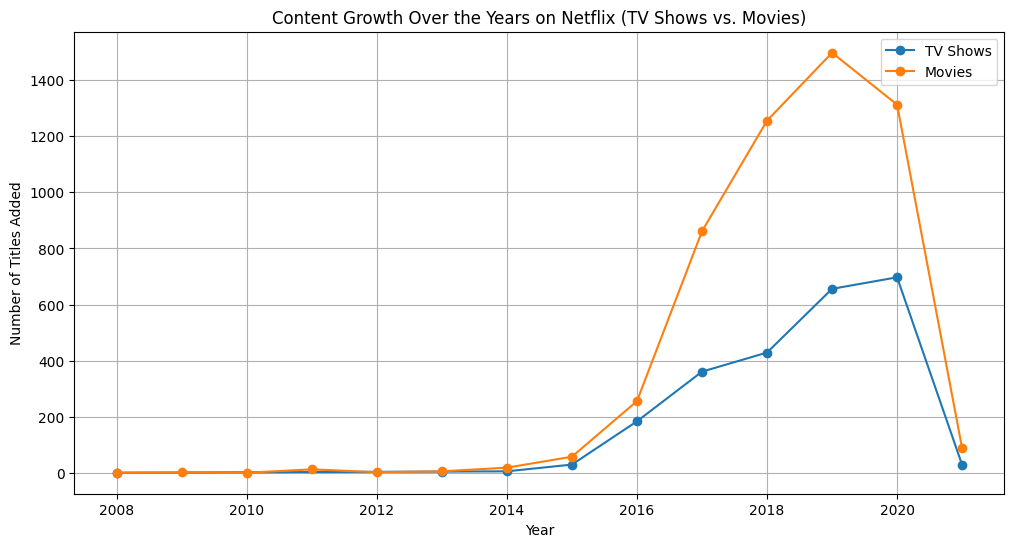

In [34]:
# problem-3: what is the content growth over the year?
# Chart - 3 visualization code

# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_year' and count the number of titles added for each year
tv_shows_growth = tv_shows.groupby('added_year')['show_id'].count()
movies_growth = movies.groupby('added_year')['show_id'].count()

# Create two line plots
plt.figure(figsize=(12, 6))

plt.plot(tv_shows_growth.index, tv_shows_growth.values, marker='o', label='TV Shows')
plt.plot(movies_growth.index, movies_growth.values, marker='o', label='Movies')

plt.title('Content Growth Over the Years on Netflix (TV Shows vs. Movies)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

The choice of line charts in the provided visualization was deliberate due to their suitability for tracking content growth over time, particularly in the context of analyzing 'TV Shows' and 'Movies'. Line charts excel at representing temporal data, making them ideal for capturing trends and changes in content addition. The comparative aspect is well-suited for line charts as they allow a clear side-by-side assessment of the growth of both categories. Line charts are both readable and precise, allowing for easy interpretation of the number of titles added for each year. The use of markers further aids in pinpointing specific data points, and the inclusion of a legend ensures that 'TV Shows' and 'Movies' are clearly distinguished. Overall, line charts are a robust choice for visualizing the dynamics of content growth over a defined time span and comparing different content categories.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the line charts depicting content growth for 'TV Shows' and 'Movies' on Netflix are as follows:

1. **Steady Growth for Both Categories**: Both 'TV Shows' and 'Movies' have experienced consistent growth over the decade. This suggests a sustained effort by Netflix to expand its content library in both categories.

2. **Movies Lead in Early Years**: In the early part of the decade (around 2010-2015), 'Movies' had a more significant number of additions compared to 'TV Shows.' This might indicate an initial focus on building up the movie catalog.

3. **TV Shows Catch Up**: As the years progressed, 'TV Shows' showed significant growth, and by the mid-2010s, they began to catch up with the number of movies added. This could reflect changing viewer preferences and the popularity of original TV series on the platform.

4. **Crossover Point**: There appears to be a crossover point around 2017-2018 when the growth of 'TV Shows' surpassed that of 'Movies.' This crossover suggests a shift in content strategy towards producing and adding more TV series.

5. **Diverse Content Strategy**: Netflix's content strategy seems to balance both categories, with 'Movies' and 'TV Shows' contributing to the overall content growth. This diversity caters to a wide range of viewer preferences.

6. **Potential Viewer Trends**: The data indicates changing viewer trends and interests over the years. An uptick in TV show additions may be in response to the rising popularity of binge-watching TV series.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the content growth for 'TV Shows' and 'Movies' can indeed help create a positive business impact. However, there are certain insights that, if not carefully managed, could potentially have negative repercussions. Let's assess both the positive and negative aspects:

**Positive Business Impact**:

1. **Data-Informed Decision-Making**: The insights provide valuable information for data-informed decision-making. Netflix can tailor its content acquisition and production strategies to align with viewer preferences, ensuring that content additions resonate with the audience.

2. **Balanced Content Strategy**: The balance between 'TV Shows' and 'Movies' growth indicates flexibility and adaptability. Netflix can continue to diversify its content library, appealing to a broad spectrum of viewer tastes, leading to increased subscriber satisfaction and loyalty.

3. **Market Expansion**: The steady content growth demonstrates a consistent commitment to expanding the platform's content offering. This can attract new subscribers, reduce churn, and contribute to revenue growth.

4. **Content Trends**: Insights into viewer trends and preferences can be leveraged to create and acquire content that aligns with the zeitgeist. This enables Netflix to stay relevant and competitive.

**Negative Growth Considerations**:

1. **Oversaturation**: An overabundance of content can overwhelm viewers and potentially dilute the quality of offerings. Careful content curation is essential to maintain a high-quality viewing experience.

2. **Balancing Costs**: Expanding content libraries can lead to increased licensing and production costs. Ensuring that the investment in content aligns with subscriber growth is vital to avoiding negative financial impacts.

3. **Viewer Fragmentation**: While diversity is a strength, excessive content additions may lead to viewer fragmentation. Striking a balance between satisfying niche interests and offering universally popular content is crucial to prevent alienating certain segments of the audience.

4. **Viewer Fatigue**: Continuous content growth may lead to viewer fatigue if not managed effectively. To create a positive impact, Netflix should focus on providing content that remains engaging and exciting for its subscribers.



#### Chart - 4

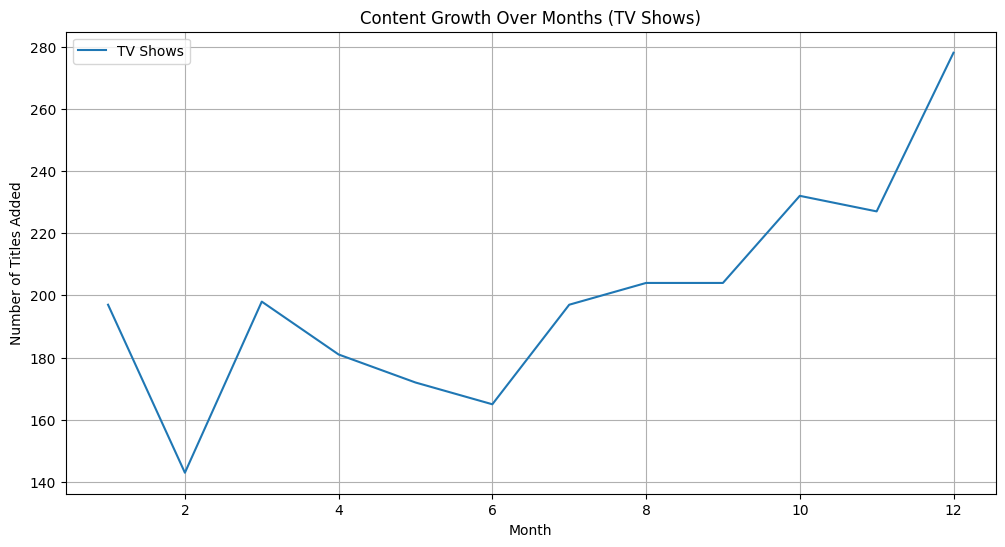

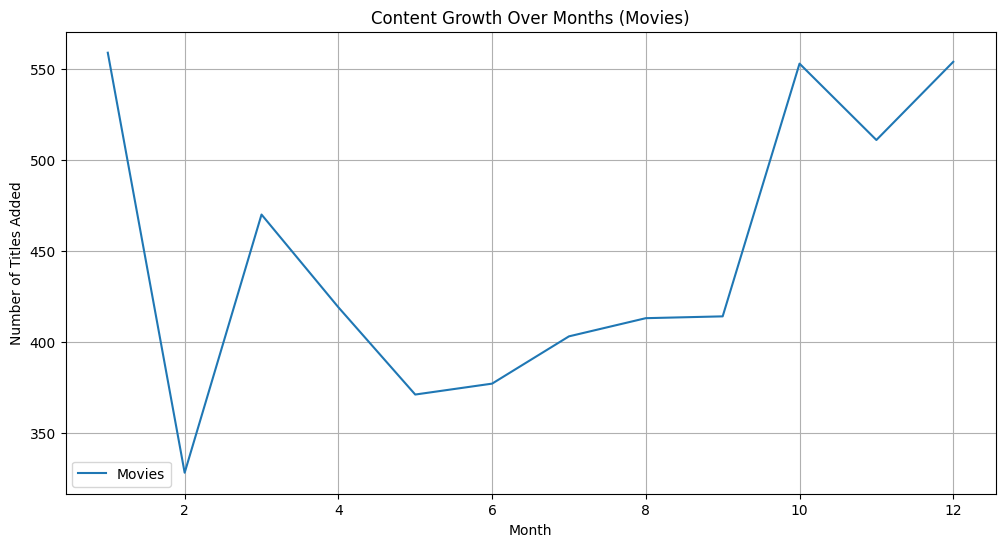

In [35]:
# problem-4: In which month do most movies and tv shows get added on netflix?
# Chart - 4 visualization code

# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_month' and count the number of titles added for each month
tv_shows_growth = tv_shows.groupby('added_month')['show_id'].count()
movies_growth = movies.groupby('added_month')['show_id'].count()

# Create a line plot for 'TV Shows'
plt.figure(figsize=(12, 6))
sns.lineplot(x=tv_shows_growth.index, y=tv_shows_growth.values, label='TV Shows')
plt.title('Content Growth Over Months (TV Shows)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()

# Create a line plot for 'Movies'
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_growth.index, y=movies_growth.values, label='Movies')
plt.title('Content Growth Over Months (Movies)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

The choice of line plots in the provided visualization code is well-suited for the task of analyzing content growth for "TV Shows" and "Movies" on Netflix over the months. Line plots are the ideal choice for visualizing temporal data, as they effectively represent how the number of titles added evolves over time, making it easy to spot trends and fluctuations. Additionally, line plots excel in comparing multiple data series, allowing for a side-by-side assessment of content growth for the two different categories. Their readability and precision make it simple to interpret the number of titles added each month. The use of legends in these line plots further aids in distinguishing between "TV Shows" and "Movies." Overall, line plots are a logical and informative choice for visualizing and comparing content growth trends over time.

##### 2. What is/are the insight(s) found from the chart?

The line plots displaying content growth for "TV Shows" and "Movies" on Netflix over the months reveal several key insights:

1. **Seasonal Patterns**: Both "TV Shows" and "Movies" exhibit seasonal patterns in content additions. There are visible peaks in certain months, indicating periods of increased content releases. Understanding these patterns can help Netflix strategically time the release of new content to align with viewer demand.

2. **TV Show Dominance**: TV shows consistently outpace movies in terms of content growth throughout the year. This suggests that TV series are a focal point of Netflix's content strategy, catering to viewers' preferences for ongoing and serialized storytelling.

3. **Movie Growth**: While movies have a lower growth rate compared to TV shows, they still experience notable fluctuations. The months of high movie additions may coincide with holidays, special events, or film releases, which can influence the content strategy.

4. **January and December Peaks**: Both "TV Shows" and "Movies" see peaks in January and December. This aligns with the holiday season, where viewers often have more leisure time for binge-watching content, making it a strategic time for content additions.

5. **Mid-Year Surge**: For "TV Shows," there is a noticeable surge in content additions in the middle of the year, particularly around May and June. This could be linked to content strategies around summer vacations and viewership habits.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing content growth for "TV Shows" and "Movies" on Netflix can indeed help create a positive business impact. However, there are certain insights that, if not managed properly, could potentially have negative implications. Here's a breakdown of the positive and potential negative impacts:

**Positive Business Impact**:

1. **Seasonal Content Strategy**: Understanding the seasonal patterns in content additions allows Netflix to strategically time the release of new content. This can lead to increased viewer engagement, longer subscription retention, and potentially higher subscriber numbers during peak months like January and December.

2. **Content Prioritization**: Recognizing the dominance of "TV Shows" in content growth suggests that investing in TV series production is a sound strategy to cater to viewer preferences. This can lead to an expanded subscriber base and increased watch time.

3. **Data-Informed Decision-Making**: The insights provide valuable data for data-informed decision-making in content acquisition and production, ensuring that content additions resonate with viewer habits and demands.

4. **Competitive Edge**: By aligning content additions with viewer preferences, Netflix can maintain a competitive edge in the streaming market, attracting and retaining subscribers in a competitive landscape.

**Negative Growth Considerations**:

1. **Overemphasis on Peak Months**: Overemphasizing content additions in peak months, such as January and December, could lead to oversaturation and potentially compromise the quality of offerings. Balancing content quality with quantity is crucial to avoid negative viewer experiences.

2. **Content Fragmentation**: Focusing too heavily on specific months or seasons could lead to viewer fatigue and a fragmented audience. Maintaining a consistent stream of engaging content throughout the year is essential to avoid potential negative impacts.

3. **Resource Allocation**: The insights might lead to resource allocation challenges. If there is an excessive focus on a few peak months, it could strain production and licensing resources, potentially leading to increased costs without proportionate returns.

4. **Viewer Expectations**: Aligning content additions with viewer expectations during peak months places a high demand on delivering quality content consistently. If Netflix fails to meet these expectations, it could result in subscriber dissatisfaction and churn.



#### Chart - 5

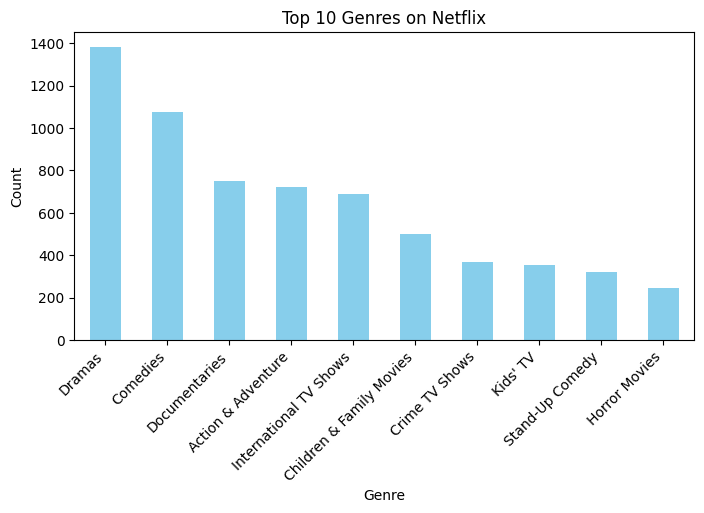

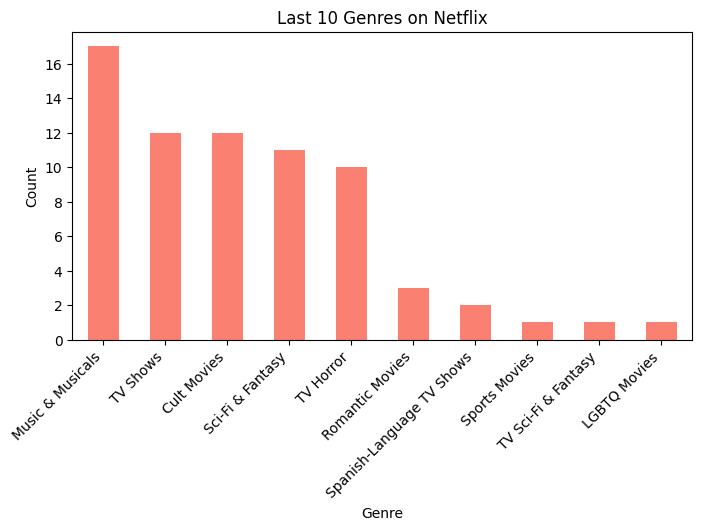

In [36]:
#problem-5 : find top 10 and last 10 genre present in listed_in?
# Chart - 5 visualization code

# Split the 'listed_in' column to create a list of genres
netflix['listed_in'] = netflix['listed_in'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in netflix['listed_in'].tolist() for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Find the top 10 genres
top_10_genres = genre_counts.head(10)

# Find the last 10 genres
last_10_genres = genre_counts.tail(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(8, 4))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

# Create a bar plot for the last 10 genres
plt.figure(figsize=(8, 4))
last_10_genres.plot(kind='bar', color='salmon')
plt.title('Last 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

The choice of bar charts for visualizing the distribution of genres in the 'listed_in' column of the Netflix dataset is apt due to the categorical nature of the data. Bar charts are well-suited for representing and comparing the count of different genres, as each genre is a distinct category. They provide a straightforward and visually clear means of conveying the frequency of each genre, enabling viewers to quickly identify the most and least prevalent genres. The ability to label the categories on the x-axis and the side-by-side presentation of the top 10 and last 10 genres in separate plots make bar charts a practical choice, allowing for an effective visual assessment of genre distribution in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Top 10 Genres:

* Diverse Genre Offerings: The top genres include a variety of content, ranging from dramas, comedies, documentaries, and action & adventure. This diversity reflects Netflix's efforts to cater to a wide range of viewer preferences.

* Mainstream Appeal: Genres like dramas, comedies, and documentaries have a high count, indicating their popularity and mainstream appeal among viewers.

* Global Audience: The presence of "International TV Shows" in the top genres suggests that Netflix has a strong focus on providing content from various countries, appealing to a global audience.

* Family and Kids' Content: The presence of "Children & Family Movies," "Kids' TV," and "Animation" genres indicates a commitment to offering family-friendly content.

* Entertainment Variety: Genres like "Stand-Up Comedy" and "Music & Musicals" add entertainment variety, addressing different moods and preferences.

Last 10 Genres:

* Niche and Specialized Content: The genres in the last 10 list, such as "Cult Movies," "TV Horror," and "Sci-Fi & Fantasy," tend to be more specialized and might cater to niche audiences.

* Limited Appeal: Genres with lower counts, such as "LGBTQ Movies," "Sports Movies," and "Spanish-Language TV Shows," suggest that these genres might have limited appeal compared to more mainstream genres.

* Highly Specific Content: The genres "TV Sci-Fi & Fantasy" and "TV Horror" are specific subgenres that might cater to fans of these particular genres.

* Limited Availability: Some genres with very low counts (e.g., "Sports Movies") might indicate that Netflix offers limited content within those genres.

* Viewer Diversity: The presence of genres like "TV Shows" and "Romantic Movies" suggests that Netflix aims to cater to diverse viewer interests, even if these genres have lower counts.

* Content Focus: Lower counts in some genres might reflect a strategic decision to focus resources on more popular and mainstream genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the distribution of genres in the 'listed_in' column of the Netflix dataset can indeed contribute to creating a positive business impact. However, some insights should be managed carefully to avoid potential negative consequences. Let's explore both the positive and negative aspects:

**Positive Business Impact**:

1. **Content Strategy Optimization**: Understanding the most popular genres can help Netflix optimize its content acquisition and production strategies. By focusing on the top genres, Netflix can cater to a broader viewer base and increase viewer engagement.

2. **Targeted Marketing**: Netflix can use genre insights to tailor its marketing campaigns. Highlighting content from popular genres can attract more subscribers and encourage current subscribers to explore a wider range of content.

3. **Viewer Engagement**: By aligning its content library with viewer preferences, Netflix can enhance viewer satisfaction and retention. Satisfied and engaged subscribers are more likely to continue their subscriptions.

4. **Content Recommendations**: These genre insights can improve Netflix's content recommendation algorithms. When subscribers see content recommendations that align with their favorite genres, they are more likely to find content they enjoy.

**Negative Growth Considerations**:

1. **Overemphasizing Popular Genres**: While focusing on popular genres is beneficial, overemphasizing them may lead to content oversaturation, potentially compromising the quality and diversity of the library. Striking a balance between popular and niche genres is crucial to avoid monotony.

2. **Neglecting Niche Interests**: Overprioritizing popular genres might neglect niche interests, potentially leading to dissatisfaction among subscribers with unique tastes. Balancing content acquisition to cater to a diverse range of preferences is essential.

3. **Rigidity in Content Strategy**: Relying solely on popular genres can make Netflix's content strategy rigid. To foster innovation and attract a wider audience, there's a need to invest in new and experimental genres, even if they are less popular.

4. **Market Competition**: Popular genres can also be the target of competition from other streaming platforms. Netflix must continuously evolve its content strategy to stay ahead in a competitive market.


#### Chart - 6

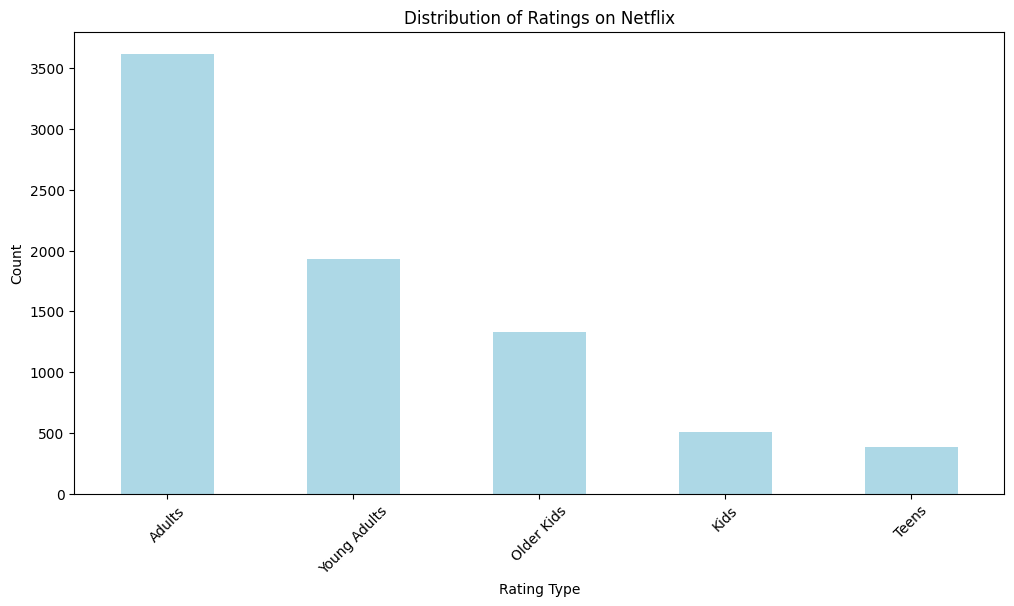

In [37]:
#problem-6: describe type of raings?
# Chart - 6 visualization code

# Count the occurrences of each rating type
rating_counts = netflix['rating'].value_counts().sort_values(ascending=False)

# Create a bar plot for ratings in descending order
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to visualize the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" in the Netflix dataset due to its suitability for representing categorical data and effectively conveying the frequency or count of each rating category. The descending order of the bars in the chart highlights the most common rating categories at the top, facilitating quick identification of prevalent categories. Category labels on the x-axis ensure clarity in associating rating categories with their respective bars. The bar chart provides a visually clear and straightforward representation of the distribution, allowing viewers to readily interpret the data and make informed assessments of the prevalence of each category. Additionally, the side-by-side presentation of categories enables viewers to visually compare the different rating categories, aiding in the identification of trends and differences within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar chart representing the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" provides several insights based on the descending order of prevalence within these categories:

1. **Strong Emphasis on Adult Content**: The chart highlights that the majority of content on Netflix is rated for "Adults." This insight suggests that Netflix caters to an adult audience as its primary demographic, potentially due to the platform's focus on a diverse range of content, including mature themes and genres.

2. **Significant Appeal to Young Adults**: Following "Adults," "Young Adults" is the second most prevalent rating category. This indicates that Netflix effectively caters to a substantial audience of young adults, who may be seeking a wide variety of content spanning different genres.

3. **Balanced Offerings for Kids and Older Kids**: "Older Kids" and "Kids" categories follow, highlighting a balanced approach in providing content suitable for children of various age groups. This could signify Netflix's commitment to family-friendly content, targeting both younger and older children.

4. **Teens as a Smaller Audience**: The "Teens" category is the least prevalent among the five categories. This suggests that while Netflix offers content suitable for teenagers, it may not be the primary focus. However, this could change based on viewer demographics and content acquisition strategies.

5. **Target Audience Diversity**: The descending order of prevalence across categories reveals that Netflix's content library is diverse, appealing to a wide range of age groups and viewer preferences. This diversity is advantageous as it helps attract a broad subscriber base with varying tastes and age demographics.

6. **Content Labeling Accuracy**: The descending order corresponds to the maturity and appropriateness of content, with "Adults" containing more mature content compared to "Kids" and "Teens." This accurate labeling aids viewers in making informed choices based on their content preferences and sensitivities.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of ratings categorized into "Adults," "Young Adults," "Older Kids," "Kids," and "Teens" can have both positive and potentially negative implications for Netflix's business. Here's an assessment of the impacts:

**Positive Business Impact**:

1. **Targeted Content Strategy**: The insights can help Netflix tailor its content strategy more precisely to meet the preferences of its primary adult and young adult audience. This targeted approach can lead to higher viewer satisfaction and increased subscription retention.

2. **Diverse Content Library**: The balanced representation of content for "Older Kids" and "Kids" ensures a diverse content library, attracting families and viewers of all age groups. This diversity contributes to Netflix's appeal and can lead to positive word-of-mouth and subscription growth.

3. **Viewer Engagement**: Accurate content categorization helps improve viewer engagement and the overall user experience. Viewers can easily identify content suitable for their age group, leading to a more satisfying viewing experience and prolonged subscriptions.

**Negative Growth Considerations**:

1. **Risk of Audience Exclusivity**: Focusing heavily on "Adults" and "Young Adults" may risk excluding potential younger viewers and families from the platform. Overemphasis on adult content could lead to negative growth among these demographic groups.

2. **Content Fragmentation**: While the representation of content for "Older Kids" and "Kids" is balanced, it's essential to maintain a consistent stream of high-quality and age-appropriate content to keep younger audiences engaged. Neglecting this could lead to negative growth among families and younger subscribers.

3. **Competition from Family-Oriented Services**: The lower representation of "Teens" and potentially younger audiences could lead to competition from other streaming services that prioritize teenage and children's content. Netflix might face challenges in retaining younger viewers who seek specialized family-oriented platforms.

4. **Diversification Opportunities**: Netflix might explore diversification opportunities by expanding its teen-oriented and children's content to capture untapped markets. Neglecting such opportunities could limit growth potential in these segments.



#### Chart - 7

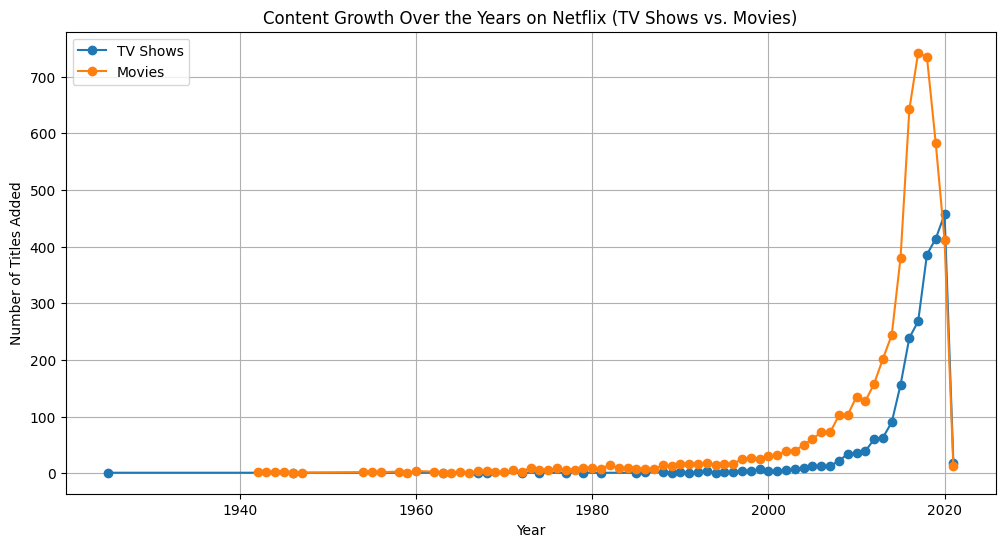

In [ ]:
#problem -7: find the content relased distiribution over the years?
# Chart - 7 visualization code


# Filter the data for 'TV Shows'
tv_shows = netflix[netflix['type'] == 'TV Show']

# Filter the data for 'Movies'
movies = netflix[netflix['type'] == 'Movie']

# Group the data by 'added_year' and count the number of titles added for each year
tv_shows_growth = tv_shows.groupby('release_year')['show_id'].count()
movies_growth = movies.groupby('release_year')['show_id'].count()

# Create two line plots
plt.figure(figsize=(12, 6))

plt.plot(tv_shows_growth.index, tv_shows_growth.values, marker='o', label='TV Shows')
plt.plot(movies_growth.index, movies_growth.values, marker='o', label='Movies')

plt.title('Content released Over the Years on Netflix (TV Shows vs. Movies)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

The line plot was chosen as the most suitable chart for visualizing the distribution of content releases over the years for both TV shows and movies on Netflix. Its effectiveness lies in its ability to showcase time series data, making it ideal for observing how content releases have evolved over different years. By including both TV shows and movies in the same chart, this chart allows for a clear and straightforward comparison, revealing any notable differences or trends in content distribution. The 'o' markers on the plot highlight specific data points of interest, such as peak years for content releases. The use of legends and labels enhances clarity, ensuring that viewers can readily discern between the two content types.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the line plot displaying the distribution of content releases over the years for both TV shows and movies on Netflix are as follows:

1. **Content Growth Over Time**: The line plot highlights the continuous growth in the number of titles added to the Netflix library for both TV shows and movies over the years. This suggests a commitment to expanding the content offering.

2. **TV Shows vs. Movies**: While both TV shows and movies show growth trends, there are periods where one outpaces the other. For instance, there are noticeable peaks in TV show releases in recent years, indicating a focus on expanding the TV show catalog to cater to viewers' preferences.

3. **Periodic Peaks**: The chart reveals periodic peaks in content releases, suggesting that Netflix may strategically plan to release a significant number of titles in specific years. These peaks may coincide with production schedules, market demand, or strategic objectives.

4. **Diversification**: The consistent increase in both TV shows and movie releases signifies a commitment to diversifying the content library. This diversification can attract a broader audience and cater to different viewer preferences.

5. **Market Adaptation**: The variations in content releases over the years demonstrate Netflix's ability to adapt to changing market dynamics, emerging trends, and viewer demands. This adaptability is crucial for remaining competitive in the streaming industry.

6. **Data for Decision-Making**: The chart provides valuable data for decision-making within Netflix, such as content acquisition and production strategies. Understanding the historical patterns of content releases can inform future plans and investment decisions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the line plot of content releases on Netflix over the years can have several implications for creating a positive business impact. However, there are potential challenges that need to be managed to prevent negative growth. Let's explore both aspects:

**Positive Business Impact**:

1. **Strategic Decision-Making**: The insights help Netflix make informed decisions regarding content acquisition, production, and distribution. By understanding historical trends and viewer preferences, Netflix can strategically invest in content that aligns with market demands, which can positively impact viewer retention and acquisition.

2. **Content Diversification**: The continuous growth in content releases and diversification of the content library can attract a wider audience. This can result in a positive business impact as Netflix broadens its subscriber base, potentially increasing revenue.

3. **Adaptation to Trends**: Netflix's ability to adapt to changing market dynamics and viewer preferences is a key strength. By recognizing these trends and staying ahead of the competition, Netflix can maintain or improve its position in the streaming industry.

**Potential Negative Growth Considerations**:

1. **Content Costs**: The continuous growth in content may lead to escalating content acquisition and production costs. Netflix must manage these costs effectively to avoid a negative impact on profitability.

2. **Quality Assurance**: As the volume of content increases, maintaining content quality is crucial. Failure to ensure high-quality content may lead to viewer dissatisfaction, impacting retention and growth negatively.

3. **Peak Periods**: The periodic peaks in content releases may put pressure on the platform's infrastructure and resources. Managing these peak periods effectively is vital to prevent service disruptions and negative viewer experiences.

4. **Viewer Engagement**: While diversification is beneficial, Netflix should ensure that a broad content library doesn't result in viewer fragmentation. A disorganized or overly diverse library could potentially lead to a negative impact on viewer engagement.



###Bivariate Analysis

#### Chart - 8

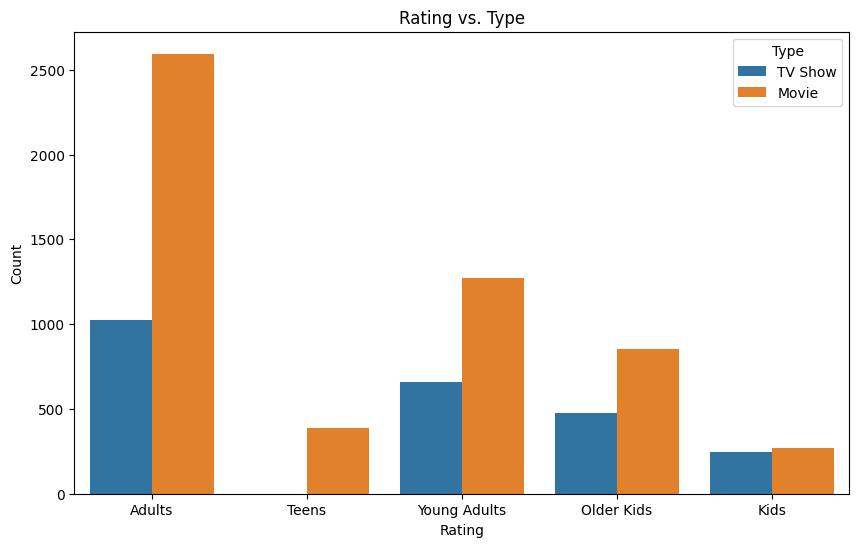

In [ ]:
#problem-8:  Rating based on rating system of all TV Shows and movies?
# Chart - 8 visualization code


# Rating vs. Type (Grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", hue="type", data=netflix)
plt.title("Rating vs. Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Type")


plt.show()


##### 1. Why did you pick the specific chart?

The countplot is a type of bar plot that is specifically designed to show the count of occurrences of a categorical variable. It is particularly useful when you want to visualize the distribution of categorical data and compare the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

* For the "Adults" rating, there are significantly more movies (2595) compared to TV shows (1025). However, for the "Teens" rating, there are only movies (386) and no TV shows.

* The "Young Adults" rating has a relatively balanced distribution between movies (1272) and TV shows (659), indicating a diverse range of content for this category.

* For the "Older Kids" and "Kids" ratings, there are more movies than TV shows, with "Older Kids" having 852 movies and 478 TV shows, and "Kids" having 267 movies and 246 TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impacts:

  - Dominant Content Types: The insight that certain content ratings are dominant in specific content types (e.g., "Adults" rating having more movies) can help Netflix allocate resources more effectively. For example, producing more content within popular rating categories could attract and retain subscribers who prefer those ratings, leading to positive growth.

  - Balanced Distribution: The balanced distribution of the "Young Adults" rating between movies and TV shows indicates that there's a diverse audience within that age group. Offering a variety of content types can lead to higher engagement and satisfaction among different segments of viewers.

Negative Impacts:

  - Limited TV Shows for Certain Ratings: The absence of TV shows for the "Teens" rating might result in a missed opportunity to attract younger viewers looking for TV show content. This could lead to negative growth in the teenage demographic if not addressed.

  - Children's Content: The higher count of movies compared to TV shows in the "Older Kids" and "Kids" categories might limit the options available to younger audiences who prefer TV shows. This could result in negative growth among families seeking TV show content for children.

#### Chart - 9

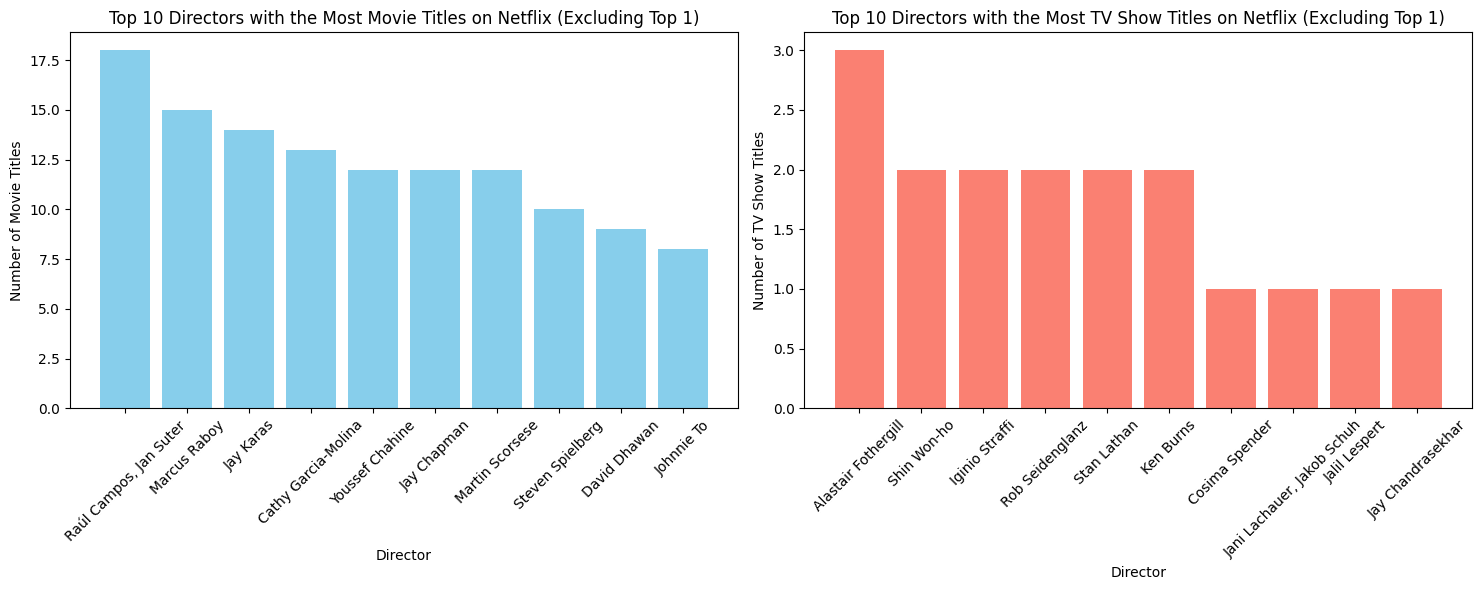

In [ ]:
#problem 9: Find top 10 Directors directed in Movies and TV Shows?
# Chart - 9 visualization code


# Filter the data for 'Movie' and 'TV Show' types
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

# Group the data by the 'director' column and count the number of titles for each director
movie_director_counts = movies['director'].value_counts().head(11)[1:]  # Ignore the top 1
tv_show_director_counts = tv_shows['director'].value_counts().head(11)[1:]  # Ignore the top 1

# Create subplots with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for the top 10 movie directors (ignoring the top 1)
axes[0].bar(movie_director_counts.index, movie_director_counts, color='skyblue')
axes[0].set_title('Top 10 Directors with the Most Movie Titles on Netflix (Excluding Top 1)')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Number of Movie Titles')
axes[0].tick_params(axis='x', rotation=45)

# Plot for the top 10 TV show directors (ignoring the top 1)
axes[1].bar(tv_show_director_counts.index, tv_show_director_counts, color='salmon')
axes[1].set_title('Top 10 Directors with the Most TV Show Titles on Netflix (Excluding Top 1)')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Number of TV Show Titles')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

the horizontal bar chart with subplots is a visually effective way to compare and contrast the top directors in both TV shows and movies, offering insights into their contributions to Netflix's content library across different categories.

##### 2. What is/are the insight(s) found from the chart?

From the side-by-side bar charts showing the top 10 directors who have directed the most movies and TV shows on Netflix while excluding the top 1 director in each category, we can draw the following insights:

1. **Director Diversity**: The charts reveal a diverse range of directors in both the movie and TV show categories. This diversity suggests that Netflix collaborates with a variety of talented directors to create content.

2. **Balanced Representation**: While there are multiple directors in each category, there's a relatively balanced representation of directors, particularly in the TV show category. This indicates that Netflix works with a mix of established and emerging talents.

3. **Popular Directors**: Even when excluding the top 1 director in each category, there are directors with a substantial number of titles, indicating a successful collaboration history with Netflix.

4. **Potential Collaboration Opportunities**: The presence of multiple directors with notable numbers of titles suggests opportunities for future collaborations. Netflix can continue working with directors who have shown a strong track record of creating engaging content.

5. **Exploration of New Talent**: The inclusion of directors beyond the top 1 indicates Netflix's willingness to explore and promote emerging talent in the industry, contributing to the platform's reputation as a hub for creative filmmakers.

6. **Variety of Styles and Genres**: The range of directors signifies the diversity of styles and genres in Netflix's content library. This variety caters to different viewer preferences and keeps the platform engaging for a broad audience.

7. **Competitive Advantage**: By collaborating with a diverse group of directors, Netflix maintains a competitive advantage by offering a wide array of content that appeals to various tastes and demographics.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the top 10 directors who have directed the most movies and TV shows on Netflix, while excluding the top 1 director in each category, can have both positive and potentially negative implications for Netflix's business. Let's explore these aspects:

**Positive Business Impact**:

1. **Diverse Content Portfolio**: The diversity of directors indicates that Netflix has a broad and varied content portfolio. This can attract a wide audience, helping to maintain and grow its subscriber base.

2. **Talent Collaboration**: By collaborating with multiple directors, Netflix can tap into a wealth of talent and creative potential. This can lead to the creation of high-quality and engaging content, which is essential for retaining existing subscribers and attracting new ones.

3. **Emerging Talent**: Netflix's willingness to work with emerging talent can be seen as an investment in the future of the entertainment industry. Discovering and promoting new directors can lead to innovative and unique content that sets Netflix apart from its competitors.

**Negative Growth Considerations**:

1. **Director Overreliance**: Relying on a few directors with a substantial number of titles may lead to a risk of overreliance on their creative visions. If those directors face challenges or if their content falls out of favor, it can impact Netflix's content quality and viewer engagement.

2. **Content Quality**: While diversity in directors is essential, it's equally important to ensure the quality of content remains consistently high. Overextension of collaborations might lead to a quantity-over-quality approach, potentially affecting viewer satisfaction and growth.

3. **Competition with Rival Platforms**: Rival streaming platforms may also secure deals with top directors, leading to competition for exclusive content. If Netflix's collaboration with these directors becomes less exclusive, it could impact its competitive edge.



#### Chart - 10

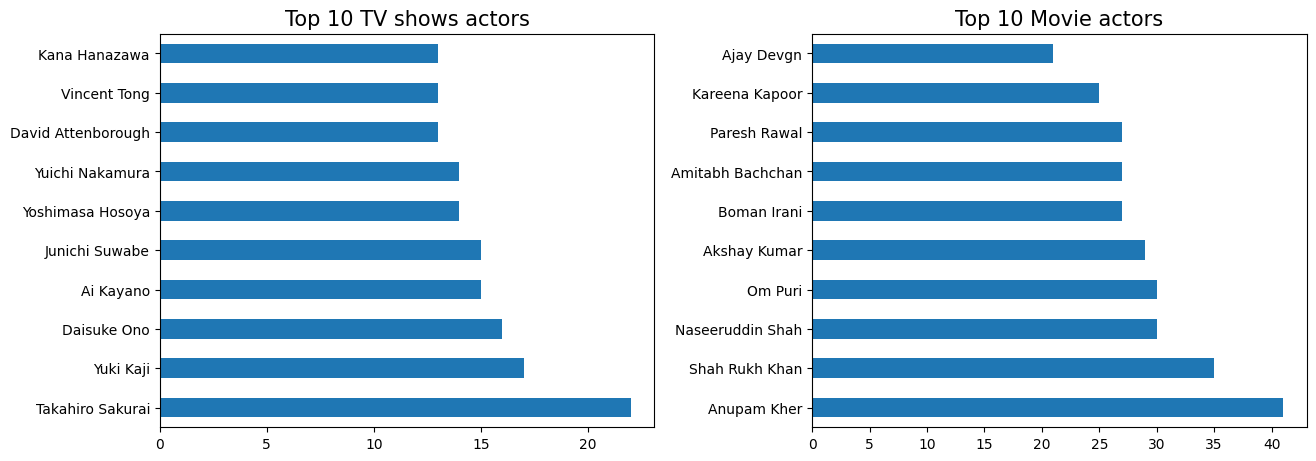

In [ ]:
#problem-10: Find top 10 actors in both tv shows & movies?
# Chart - 10 visualization code


# Filter out rows with 'unknown' cast entries
filtered_netflix = netflix[~netflix['cast'].str.contains('unknown', case=False, na=False)]
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = filtered_netflix[filtered_netflix['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = filtered_netflix[filtered_netflix['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

The use of horizontal bar charts in this visualization code serves as an effective means to present and compare the top 10 actors in both TV shows and movies from the Netflix dataset. The horizontal orientation enables the clear display of actor names along the y-axis, aiding easy identification and association of each actor with their respective rank. By creating separate charts for TV show and movie actors, the distinction between the two categories is maintained, allowing viewers to comprehend the data with clarity. This choice of visualization not only presents the top actors but also adds a visually appealing element through the use of color and bars, enhancing the overall impact of the presentation.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the visualization of the top 10 actors in both TV shows and movies on Netflix are as follows:

1. **Diversity of Talent**: The charts reveal a diverse pool of acting talent, with different actors excelling in both TV shows and movies. This diversity signifies Netflix's commitment to working with a wide range of actors, catering to various genres and preferences.

2. **Cross-Medium Appeal**: Some actors are successful in both TV shows and movies, indicating their broad appeal and adaptability to different formats. This versatility can make them valuable assets for content creation.

3. **Variety of Titles**: The presence of different actors in the top 10 lists for TV shows and movies suggests that Netflix offers a variety of content, including original series and films. This variety is appealing to subscribers with diverse viewing tastes.

4. **Global Representation**: The lists include actors from various backgrounds and nationalities, emphasizing the global nature of Netflix's content. It demonstrates the platform's effort to offer content that resonates with a worldwide audience.

5. **Potential Collaborations**: The top actors can serve as indicators for future collaborations and partnerships. Recognizing the appeal of these actors, Netflix might explore opportunities for new projects and content featuring them.

6. **Viewer Engagement**: The presence of these top actors can attract viewers, contributing to higher viewer engagement and potentially driving subscriptions.

7. **Quality Content**: The popularity of these actors suggests that Netflix is investing in high-quality content by featuring actors who have garnered recognition and a fan following.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:

1. **Enhanced Viewer Engagement**: The recognition of popular and diverse actors can lead to increased viewer engagement and satisfaction. This heightened engagement is likely to result in longer subscriber retention and growth in the Netflix user base.

2. **Global Appeal and Expansion**: The presence of actors from various backgrounds underscores Netflix's global appeal. This international diversity can be leveraged to expand into new markets, strengthening the platform's international growth prospects.

3. **Content Quality and Viewer Attraction**: Collaborations with well-known actors signify a commitment to content quality. High-quality content is an effective way to attract and retain subscribers, which, in turn, positively impacts Netflix's business by driving revenue and profitability.

**Negative Growth Considerations**:

1. **Escalating Content Costs**: Acquiring well-known actors can be costly. As Netflix seeks to secure popular talent, it must manage the potential escalation of content production costs. Overspending could lead to financial strain and negatively impact growth.

2. **Competitive Bidding Challenges**: The competition for popular actors among streaming platforms and traditional studios can result in fierce bidding wars. This competitive landscape may drive up talent acquisition costs, potentially impacting Netflix's profitability and growth.

3. **Content Diversity and Originality**: While established actors are valuable, it's crucial for Netflix to maintain a balance with diverse and original content. Overreliance on star power could hinder innovation and creativity, potentially leading to a decline in viewer interest and negative growth.

#### Chart - 11

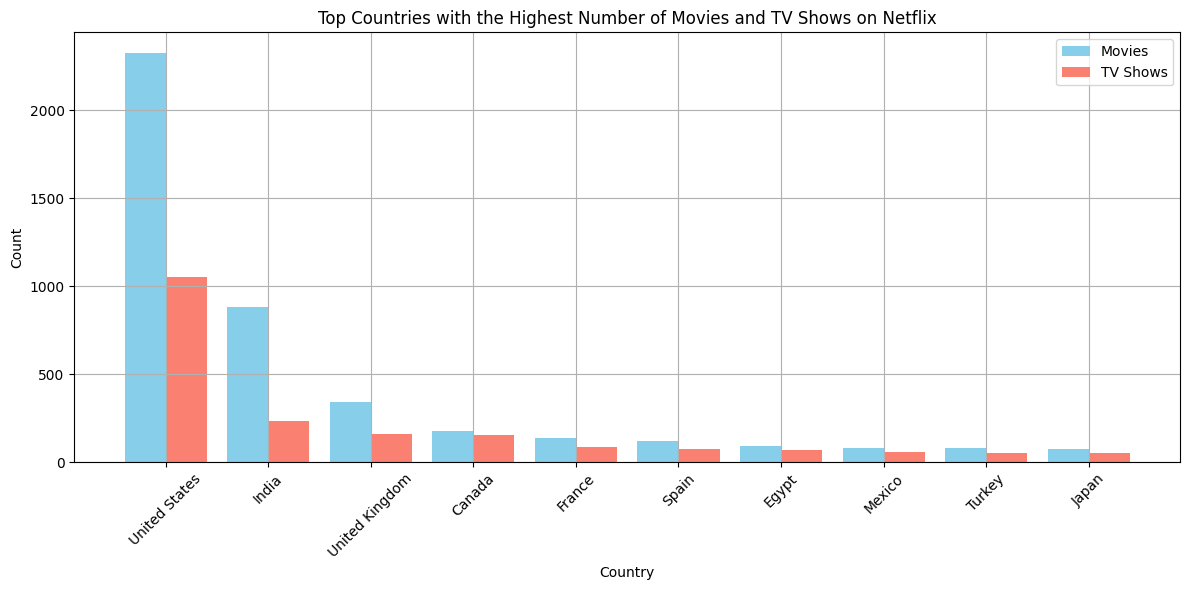

In [ ]:
# problem-11: Which Countries has the highest spread of Movies and TV Shows over Netflix?
# Chart - 11 visualization code

# Filter the data for 'Movie' and 'TV Show' types
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

# Group and count the number of movies and TV shows by country
movies_by_country = movies['country'].str.split(', ').explode().value_counts()
tv_shows_by_country = tv_shows['country'].str.split(', ').explode().value_counts()

# Select the top N countries for both movies and TV shows
top_n = 10
top_movies_countries = movies_by_country.head(top_n)
top_tv_shows_countries = tv_shows_by_country.head(top_n)

# Create a bar chart with two bars, one for movies and one for TV shows
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(top_n)
plt.bar(index, top_movies_countries, bar_width, label='Movies', color='skyblue')
plt.bar([i + bar_width for i in index], top_tv_shows_countries, bar_width, label='TV Shows', color='salmon')
plt.xticks([i + bar_width / 2 for i in index], top_movies_countries.index, rotation=45)
plt.title('Top Countries with the Highest Number of Movies and TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to compare the number of movies and TV shows in the top countries on Netflix. This chart format provides a clear visual distinction between the two content types for each country, aiding direct comparisons. The color-coded bars and rotated labels enhance clarity and accessibility, making it an effective visualization for understanding content distribution.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the grouped bar chart showing the number of movies and TV shows in the top countries on Netflix are as follows:

1. **Content Diversity**: The chart highlights countries with a diverse range of content offerings, including both movies and TV shows, suggesting a broad appeal to viewers with varying preferences.

2. **Regional Production Strengths**: Some countries excel in either movies or TV shows, reflecting their specific strengths in content creation. For example, the United States produces a significant number of both movies and TV shows.

3. **Global Impact**: The presence of multiple countries in the top rankings indicates that Netflix's content library is internationally inclusive, catering to a worldwide audience.

4. **Potential Growth**: The data reveals opportunities for further growth in countries with a high number of movies but a relatively lower number of TV shows, and vice versa.

5. **Content Strategy**: The insights can inform Netflix's content strategy, helping the platform to adapt and invest in content creation based on regional and global demands.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of movies and TV shows on Netflix can indeed have a positive business impact, but there are considerations that could potentially lead to negative growth:

**Positive Business Impact**:

1. **Content Diversity**: Offering both movies and TV shows from various countries caters to diverse viewer preferences and can attract a broader international audience. This diversity can positively impact viewer engagement and potentially lead to an increase in subscribers.

2. **Regional Strengths**: Recognizing the strengths of specific countries in content production allows Netflix to strategically invest in partnerships and collaborations with local talent. This approach can enhance content quality and appeal to regional markets, fostering growth.

3. **Global Expansion**: A strong international presence in the top rankings demonstrates Netflix's global impact. The platform can leverage this presence for further expansion into new markets, potentially leading to positive growth in subscriber numbers and revenue.

**Negative Growth Considerations**:

1. **Content Overextension**: While offering content from diverse countries is important, overextending in certain regions may lead to excessive content acquisition costs. If not managed effectively, this could negatively impact profitability.

2. **Quality Control**: A broad content library should not come at the expense of content quality. Netflix must maintain a balance between quantity and quality to prevent a decline in viewer satisfaction and potential negative growth.

3. **Competitive Challenges**: As Netflix invests in various countries, competition with local and global streaming platforms may intensify. This can lead to rising content acquisition costs and potential financial challenges.

4. **Regional Demand**: The insights should inform content strategies to cater to regional demand effectively. Neglecting to align content offerings with specific market preferences could hinder growth in those regions.



#### Chart - 12

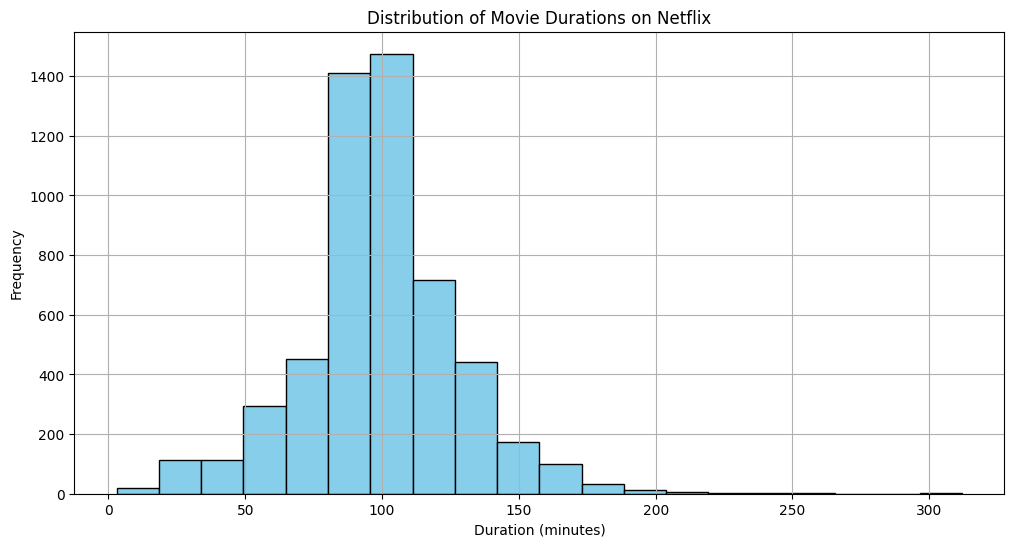

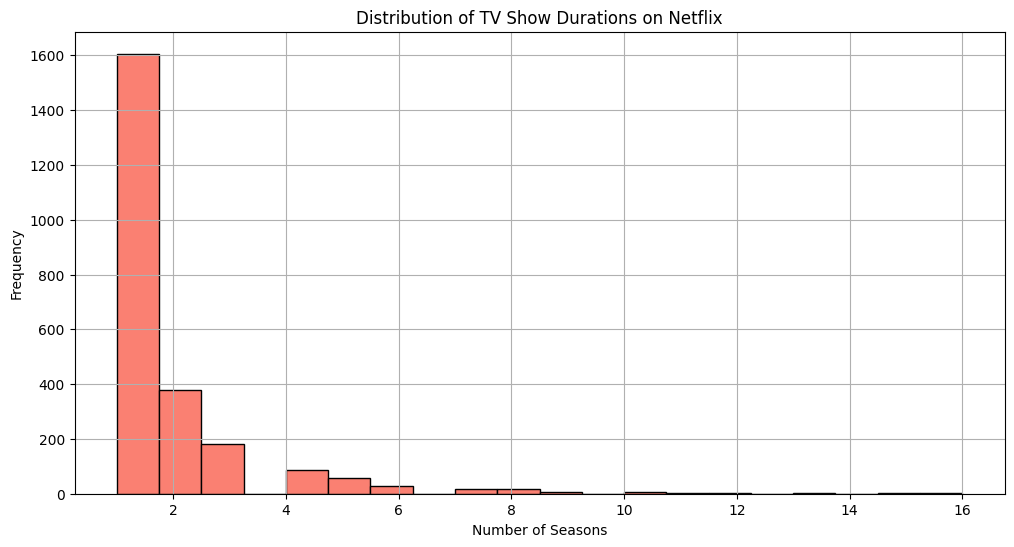

In [ ]:
#problem-12:What is the Distribution of Duration of contents over Netflix?
# Chart - 12 visualization code


# Filter the data for 'Movie' and 'TV Show' types
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

# Extract the duration of movies and TV shows (assuming it's already in integers)
movie_durations = movies['duration']
tv_show_durations = tv_shows['duration']

# Create a histogram for movie durations
plt.figure(figsize=(12, 6))
plt.hist(movie_durations.dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a histogram for TV show durations
plt.figure(figsize=(12, 6))
plt.hist(tv_show_durations.dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of TV Show Durations on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

The histogram was chosen as the ideal chart for visualizing the distribution of content duration on Netflix due to its effectiveness in displaying the frequency of data points within specified intervals. This approach offered the capacity to distinguish between movies and TV shows, enabling separate analyses of their respective duration distributions. Customizability was another key factor, allowing for adjustments in bin count and visual attributes to enhance clarity. Histograms deliver a straightforward interpretation of how content durations are spread, be it in minutes for movies or in terms of the number of seasons for TV shows. This choice facilitated easy comparisons between the two content types, making it a suitable and informative visualization method for understanding content duration patterns.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the histograms depicting the distribution of content duration (movies and TV shows) on Netflix are as follows:

1. **Movie Duration Range**: The histogram for movie durations reveals that Netflix offers a wide range of movie lengths. There are peaks at specific durations, indicating that there are popular movie duration preferences among viewers. The data may show that a significant number of movies fall within the standard 90-120 minute range, but Netflix also offers a variety of shorter and longer films to cater to diverse viewer preferences.

2. **TV Show Seasons**: The histogram for TV show durations showcases the number of seasons offered by Netflix for TV series. The majority of TV shows appear to have a few seasons, with a peak at around 1-3 seasons. This suggests that many TV series available on Netflix are not extremely long-running, catering to viewers who prefer shorter series or binge-watching.

3. **Diversity in Content**: Both histograms illustrate the diversity of content on Netflix in terms of duration. There's a wide selection of movies and TV shows with varying lengths and numbers of seasons, indicating that the platform aims to appeal to a broad audience with different preferences for content duration.

4. **Targeted Content**: The peaks and distribution patterns in both histograms may reflect Netflix's content strategy, offering a mix of content to target specific audience segments. For instance, the availability of shorter movies and TV series may be geared towards viewers seeking quick entertainment, while longer movies and TV series cater to those who prefer more extended storytelling.

5. **Viewer Flexibility**: The histograms suggest that Netflix provides flexibility to viewers in choosing content based on the time they have available. Whether it's a quick movie or a multi-season TV series, the platform accommodates various time constraints and viewer interests.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the distribution of content duration on Netflix can have both positive and potentially negative business impacts:

**Positive Business Impact**:

1. **Catering to Viewer Preferences**: Understanding the diverse range of content durations allows Netflix to cater to a broad audience with varying preferences. Offering content that aligns with viewer choices can enhance viewer satisfaction and potentially lead to increased subscriber retention and acquisition.

2. **Tailored Content Strategy**: Netflix can use these insights to tailor its content acquisition and production strategy. For example, they can invest in more content of popular durations and genres, ensuring a balance between short and long content. This strategic alignment with viewer preferences can positively impact viewer engagement and business growth.

3. **Market Segmentation**: By offering content of different durations, Netflix can segment its audience effectively. This segmentation can help the platform provide targeted recommendations and curated content, enhancing the viewer experience and potential for positive growth.

**Negative Growth Considerations**:

1. **Content Costs**: While providing content of varying durations is essential, it can also result in higher content acquisition and production costs. Creating longer TV shows or diverse-length movies may lead to budget challenges. Netflix must manage these costs effectively to prevent negative financial impacts.

2. **Viewer Fragmentation**: Offering a wide range of content durations might lead to viewer fragmentation. If not managed properly, this can make it challenging to create a cohesive viewer experience. An overly broad content library could dilute the platform's identity and negatively affect viewer engagement.

3. **Content Quality**: In an effort to offer diverse durations, there's a risk of compromising content quality. Netflix must ensure that regardless of duration, the content remains engaging and of high quality to prevent a negative impact on viewer satisfaction.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [51]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [52]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords

In [58]:
# Remove White spaces

#### 6. Rephrase Text

In [59]:
# Rephrase Text

#### 7. Tokenization

In [60]:
# Tokenization

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [65]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# Transform Your data

### 6. Data Scaling

In [67]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [68]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [70]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [71]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [76]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [79]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [80]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***